In [4]:
from google.colab import files
import zipfile
import os

# Upload file zip
uploaded = files.upload()

# Extract zip file
for zip_filename in uploaded.keys():
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall('dataset')  # Extract to 'dataset' directory

# List extracted files
print('List of extracted files:')
print(os.listdir('dataset'))


Saving Sepatu.zip to Sepatu.zip
List of extracted files:
['Sepatu']


Found 299 images belonging to 1 classes.
Epoch 1/20
9/9 [==============================] - 8s 441ms/step - loss: 8772090880.0000 - accuracy: 0.4981
Epoch 2/20
9/9 [==============================] - 4s 409ms/step - loss: 475987334660096.0000 - accuracy: 0.2809
Epoch 3/20
9/9 [==============================] - 4s 414ms/step - loss: 1259682571835408384.0000 - accuracy: 0.5993
Epoch 4/20
9/9 [==============================] - 4s 359ms/step - loss: nan - accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 4s 386ms/step - loss: nan - accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 4s 466ms/step - loss: nan - accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 3s 399ms/step - loss: nan - accuracy: 1.0000
Epoch 8/20
9/9 [==============================] - 4s 369ms/step - loss: nan - accuracy: 1.0000
Epoch 9/20
9/9 [==============================] - 4s 379ms/step - loss: nan - accuracy: 1.0000
Epoch 10/20
9/9 [==============================] - 4s 

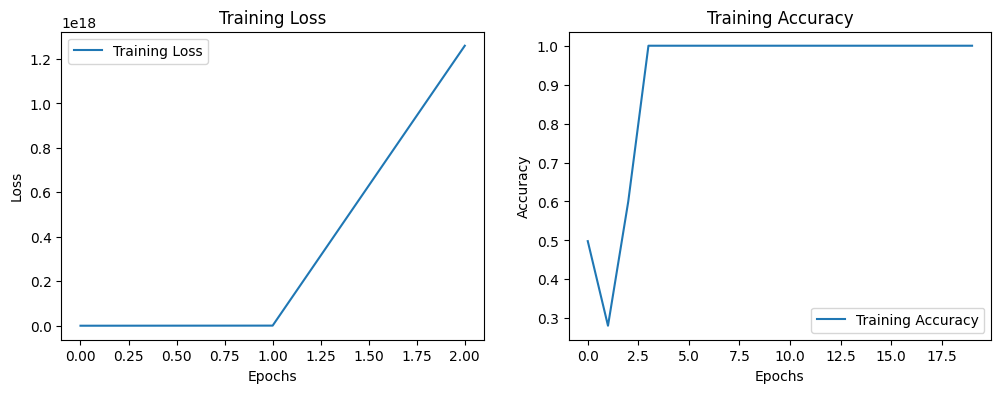

NotADirectoryError: [Errno 20] Not a directory: 'Sepatu.zip'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG16

# Definisikan lokasi dataset
dataset_path = "dataset"

# Definisikan ukuran gambar yang diharapkan
img_height, img_width = 224, 224

# Preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator untuk training set
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical')

# Membangun model VGG16
input_tensor = Input(shape=(img_height, img_width, 3))
base_model = VGG16(weights=None, include_top=False, input_tensor=input_tensor)
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melakukan training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    verbose=1)

# Plot loss dan accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Melakukan prediksi menggunakan data lain
test_data_path = "Sepatu.zip"
test_images = os.listdir(test_data_path)[:9]

plt.figure(figsize=(10, 10))
for i, img_name in enumerate(test_images):
    img_path = os.path.join(test_data_path, img_name)
    img = plt.imread(img_path)
    img = img / 255.0  # Normalisasi
    img = img[np.newaxis, ...]  # Menambahkan dimensi batch
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    plt.subplot(3, 3, i+1)
    plt.imshow(img[0])
    plt.title("Predicted Class: {}".format(predicted_class))
    plt.axis('off')

plt.show()
